In [21]:
%pip install scipy numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/8e/ee/8a26858ca517e9c64f84b4c7734b89bda8e63bec85c3d2f432d225bb1886/scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 746.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculus

## It all starts with motion...

Calculus was developed simmultaneously by Goldfreid Leibnitz and Sir Isaac Newton to solve a very practical problem: give a mathematical description of motion. Say you travel from the SAS library to the cooler to take a drink. Along the way you stop for a moment to greet Akhmed and then proceed towards your goal picking up a faster pace to not accedentally get into another social interaction.

Let's denote your distance along that path as $l$, time as $t$. Then your average velocity $v$ will be given by $$v = \dfrac{l}{t}$$
Ratio of length divided by time, that is the definition of average velocity.

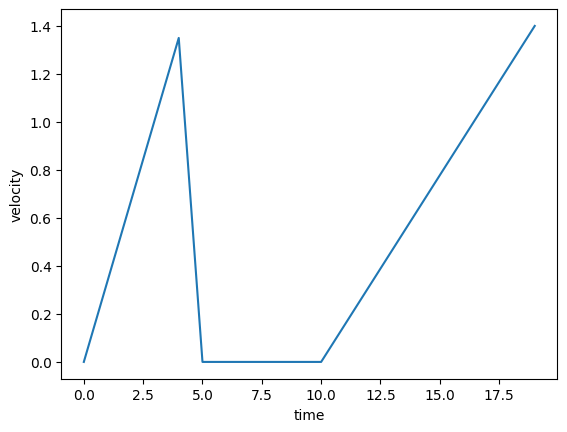

In [59]:
from math import floor

v1 = np.linspace(0, 1.35, 5)
v2 = np.full([5], 0)
v3 = np.linspace(0, 1.4, 10)

v = np.concatenate((v1, v2, v3))
t = np.arange(0, len(v))

plt.plot(t, v)
plt.xlabel("time")
plt.ylabel("velocity")
plt.show()

Our position changes like so:

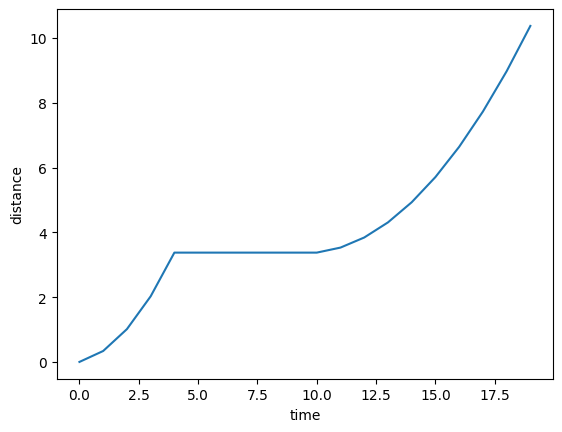

In [60]:
from scipy.interpolate import BSpline, make_interp_spline

l = np.cumsum(v)

plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("distance")
plt.show()

Assuming we don't carry a speedometer on us at all times and can only measure our immediate position, how do we calculate our speed (or alternatively how does a speedometer calculate our speed)? Turns out it is a nontrivial problem considering the velocitiy changes from moment to moment. It is trivial to find average velocitity over any period of time:

$$v_\text{avg} = \dfrac{v_1 - v_2}{t_1 - t_2} = \dfrac{\Delta v}{\Delta t}$$

In math we use the Greek letter uppercase delta $\Delta$ to denote change. $\Delta v$ and $\Delta t$ here simply mean change in velocity and time repsectively.

Let's again just graph what we're finding.

In [46]:
# Graph

As the interval we use to calculate average velocity gets smaller and smaller we are getting closer and closer to **instantaneous velocity** at that point - what we actually want to find. Let's write down those values in a table.

In [47]:
# Show numerical integration using pandas

Let's graph the function $l(t)$ : travelled distance in relation to time when speed is constant.

As expected it is just a straight graph, nothing unusual there. However what happens if the speed is not constant? In other words, how do we calculate the distance travelled if the object is constantly accelerating? 

Acceleration in physics is measured in length per time squared: $$a = \dfrac{v - v_0}{t} = \dfrac{\Delta v}{\Delta t} = \dfrac{l / t}{t} = \dfrac{l}{t^2}$$ 

where $v_0$ is the starting speed.

Every object on earth if dropped will be accelerated towards the ground at rate of approximately 9.8 m/s<sup>2</sup>. Let's graph position of a freefalling object at each time t.

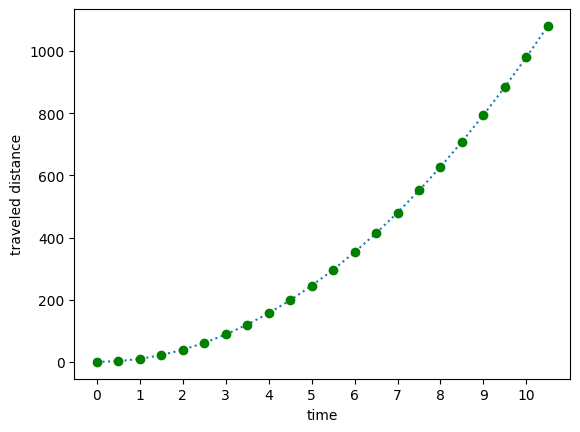

In [4]:
t = np.arange(0, 11, 0.5)
v = np.zeros_like(t)
l = np.zeros_like(t)

g = 9.8

v = g * t
l = v * t

plt.plot(t, l, ":")
plt.plot(t, l, "go")
plt.xlabel("time")
plt.ylabel("traveled distance")
plt.xticks(list(filter(is_whole_number, t)))
plt.show()